In [1]:
# -*- coding: utf-8 -*-
import glob, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## input file names

In [2]:
input_files = glob.glob("../input/car-ecu-datalogs/2018*.csv", recursive=True)
input_files

['../input/car-ecu-datalogs/20180904-home2mimos.csv',
 '../input/car-ecu-datalogs/20180727-home2mimos.csv',
 '../input/car-ecu-datalogs/20180801-mimos2home.csv',
 '../input/car-ecu-datalogs/20180802-mimos2home.csv',
 '../input/car-ecu-datalogs/20180816-mimos2home.csv',
 '../input/car-ecu-datalogs/20180810-home2mimos.csv',
 '../input/car-ecu-datalogs/20180716-home2mimos.csv',
 '../input/car-ecu-datalogs/20180817-home2mimos.csv',
 '../input/car-ecu-datalogs/20180813-mimos2home.csv',
 '../input/car-ecu-datalogs/20180719-home2mimos.csv',
 '../input/car-ecu-datalogs/20180717-home2mimos.csv',
 '../input/car-ecu-datalogs/20180807-home2mimos.csv',
 '../input/car-ecu-datalogs/20180817-mimos2home.csv',
 '../input/car-ecu-datalogs/20180810-mimos2home.csv',
 '../input/car-ecu-datalogs/20180716-mimos2home.csv',
 '../input/car-ecu-datalogs/20180808-home2mimos.csv',
 '../input/car-ecu-datalogs/20180806-mimos2home.csv',
 '../input/car-ecu-datalogs/20180717-mimos2home.csv',
 '../input/car-ecu-datalogs/

## read all data

In [3]:
all_data = None
for i in range(len(input_files)):
    csv_columns = []
    csv_columns.append('time')
    header_number = 0
    channel = ""
    with open(input_files[i]) as f:
        lines = f.readlines()
        for line in lines:
            header_number += 1
            if line.startswith('Channel : '):
                channel = line.replace('Channel : ','').replace('\n','')
            if line.startswith('Type : '):
                csv_columns.append(channel + "[" + line.replace('Type : ','').replace('\n','') + "]")
            if line.startswith('Log : '):
                break
    print("{} header={}  file={}".format(i+1, header_number, input_files[i]))
    df = pd.read_csv(input_files[i], index_col=False, skiprows=header_number, names=csv_columns)
    
    basename = os.path.basename(input_files[i])
    df['date'] = basename.replace('.csv','').split('-')[0]
    route = basename.replace('.csv','').split('-')[1]
    df['route'] = route
    df['time'] = df['date'] + " " + df['time']
    df['time'] = pd.to_datetime( df['time'], format="%Y%m%d %H:%M:%S.%f")
    df['#time_diff'] = df['time'].diff(1).dt.total_seconds()
    df['#time_seq'] = df['#time_diff'].cumsum()
    df['#road_seq'] = df['#time_seq']
    if route == "mimos2home":
        df['#road_seq'] = df['#road_seq'].max() - df['#road_seq']

    if all_data is None:
        all_data = df
    else:
        all_data = pd.concat([all_data, df])
all_data

1 header=90  file=../input/car-ecu-datalogs/20180904-home2mimos.csv
2 header=84  file=../input/car-ecu-datalogs/20180727-home2mimos.csv
3 header=84  file=../input/car-ecu-datalogs/20180801-mimos2home.csv
4 header=90  file=../input/car-ecu-datalogs/20180802-mimos2home.csv
5 header=90  file=../input/car-ecu-datalogs/20180816-mimos2home.csv
6 header=90  file=../input/car-ecu-datalogs/20180810-home2mimos.csv
7 header=84  file=../input/car-ecu-datalogs/20180716-home2mimos.csv
8 header=90  file=../input/car-ecu-datalogs/20180817-home2mimos.csv
9 header=90  file=../input/car-ecu-datalogs/20180813-mimos2home.csv
10 header=84  file=../input/car-ecu-datalogs/20180719-home2mimos.csv
11 header=84  file=../input/car-ecu-datalogs/20180717-home2mimos.csv
12 header=90  file=../input/car-ecu-datalogs/20180807-home2mimos.csv
13 header=90  file=../input/car-ecu-datalogs/20180817-mimos2home.csv
14 header=90  file=../input/car-ecu-datalogs/20180810-mimos2home.csv
15 header=84  file=../input/car-ecu-datalog

,time,AFRDifference[AFR],BatteryVoltage[BatteryVoltage],EngineRunningTime[Time_s],IgnitionTiming[Angle],CurrentDutyCycle[Percentage],Load[Pressure],IgnitionLoad[Pressure],ShiftLight1[Raw],AirTemp[Temperature],...,TransientThrottlePercentageEnrich[Percentage],Pwm_State_2[Raw],Pwm_State_1[Raw],date,route,#time_diff,#time_seq,#road_seq,DeltaLoad[Percentage],TransientThrottleLoadSource[Percentage]
0,2018-09-04 07:41:00.000,55.0,13169.0,161.0,131.0,24.0,435.0,435.0,0.0,3015.0,...,0.0,0.0,0.0,20180904,home2mimos,NaN,NaN,NaN,NaN,NaN
1,2018-09-04 07:41:00.047,55.0,13200.0,NaN,131.0,NaN,432.0,432.0,NaN,3015.0,...,NaN,NaN,NaN,20180904,home2mimos,0.047,0.047,0.047,NaN,NaN
2,2018-09-04 07:41:00.094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3016.0,...,NaN,NaN,NaN,20180904,home2mimos,0.047,0.094,0.094,NaN,NaN
3,2018-09-04 07:41:00.110,54.0,13262.0,NaN,133.0,NaN,429.0,429.0,NaN,NaN,...,NaN,NaN,NaN,20180904,home2mimos,0.016,0.110,0.110,NaN,NaN
4,2018-09-04 07:41:00.172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,20180904,home2mimos,0.062,0.172,0.172,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29158,2018-08-16 08:19:36.844,20.0,13043.0,NaN,NaN,NaN,316.0,316.0,NaN,3311.0,...,NaN,NaN,NaN,20180816,home2mimos,0.063,2371.844,2371.844,NaN,NaN
29159,2018-08-16 08:19:36.953,11.0,NaN,NaN,122.0,NaN,315.0,315.0,NaN,NaN,...,NaN,NaN,NaN,20180816,home2mimos,0.109,2371.953,2371.953,NaN,NaN
29160,2018-08-16 08:19:37.047,21.0,13043.0,NaN,121.0,NaN,317.0,317.0,NaN,3311.0,...,NaN,NaN,NaN,20180816,home2mimos,0.094,2372.047,2372.047,NaN,NaN
29161,2018-08-16 08:19:37.094,20.0,13059.0,2502.0,122.0,23.0,316.0,316.0,0.0,3310.0,...,0.0,0.0,0.0,20180816,home2mimos,0.047,2372.094,2372.094,NaN,NaN


In [4]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1414545 entries, 0 to 29162
Data columns (total 36 columns):
 #   Column                                           Non-Null Count    Dtype         
---  ------                                           --------------    -----         
 0   time                                             1414545 non-null  datetime64[ns]
 1   AFRDifference[AFR]                               1347531 non-null  float64       
 2   BatteryVoltage[BatteryVoltage]                   1301937 non-null  float64       
 3   EngineRunningTime[Time_s]                        217145 non-null   float64       
 4   IgnitionTiming[Angle]                            921768 non-null   float64       
 5   CurrentDutyCycle[Percentage]                     803508 non-null   float64       
 6   Load[Pressure]                                   1280030 non-null  float64       
 7   IgnitionLoad[Pressure]                           1280013 non-null  float64       
 8   ShiftLight1[Ra

## Scatter plot

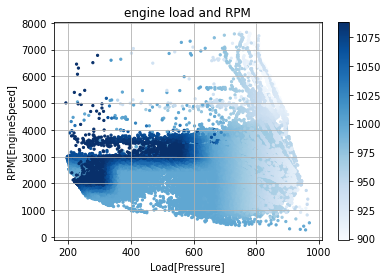

In [5]:
plt.scatter(all_data['Load[Pressure]'], all_data['RPM[EngineSpeed]'], c=all_data['TargetAFR[AFR]'], cmap='Blues', s=5)
plt.colorbar()
plt.title("engine load and RPM")
plt.xlabel("Load[Pressure]")
plt.ylabel("RPM[EngineSpeed]")
plt.grid(True)

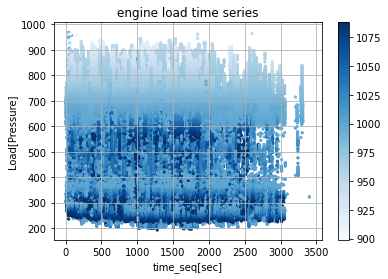

In [6]:
plt.scatter(all_data['#time_seq'], all_data['Load[Pressure]'], c=all_data['TargetAFR[AFR]'], cmap='Blues', s=5)
plt.colorbar()
plt.title("engine load time series")
plt.xlabel("time_seq[sec]")
plt.ylabel("Load[Pressure]")
plt.grid(True)

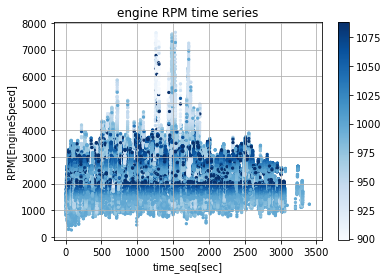

In [7]:
plt.scatter(all_data['#time_seq'], all_data['RPM[EngineSpeed]'], c=all_data['TargetAFR[AFR]'], cmap='Blues', s=5)
plt.colorbar()
plt.title("engine RPM time series")
plt.xlabel("time_seq[sec]")
plt.ylabel("RPM[EngineSpeed]")
plt.grid(True)